In [31]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [32]:
data = pd.read_csv('By State and year.csv')

In [33]:
data.head()

,YEAR,Region,State,Suicide
0,2001,Northeastern,Connecticut,45
1,2001,Northeastern,Maine,38
2,2001,Northeastern,Massachusetts,82
3,2001,Northeastern,New Hampshire,27
4,2001,Northeastern,New Jersey,93


In [34]:
data.tail(10)

,YEAR,Region,State,Suicide
1081,2021,Western,Colorado,212
1082,2021,Western,Hawaii,20
1083,2021,Western,Idaho,54
1084,2021,Western,Montana,44
1085,2021,Western,Nevada,111
1086,2021,Western,New Mexico,69
1087,2021,Western,Oregon,139
1088,2021,Western,Utah,62
1089,2021,Western,Washington,183
1090,2021,Western,Wyoming,32


In [35]:
data.dtypes

YEAR        int64
Region     object
 State     object
Suicide    object
dtype: object

In [36]:
data["Region"].value_counts()

Region
Southern        357
Western         273
Midwestern      252
Northeastern    189
All              20
Name: count, dtype: int64

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = 'By State and year.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
# Convert 'Suicide' to numeric
data['Suicide'] = pd.to_numeric(data['Suicide'], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Encode 'Region' and 'State' using Label Encoding
label_encoder_region = LabelEncoder()
label_encoder_state = LabelEncoder()

data['Region_encoded'] = label_encoder_region.fit_transform(data['Region'])


# Features and target for regression
X_regression = data[['YEAR', 'Region_encoded']]
y_regression = data['Suicide']

# Split the data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Linear Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train_reg, y_train_reg)

# Cross-validation for regression
regression_scores = cross_val_score(regression_model, X_train_reg, y_train_reg, cv=5, scoring='r2')
print(f"Regression R^2 Scores: {regression_scores}")
print(f"Mean R^2 Score: {np.mean(regression_scores)}")

# Predict and Evaluate the Regression Model
y_pred_reg = regression_model.predict(X_test_reg)
print(f"Regression model coefficients: {regression_model.coef_}")
print(f"Regression model intercept: {regression_model.intercept_}")

# Create a binary classification target: High (1) if suicides > median, Low (0) otherwise
median_suicide = data['Suicide'].median()
data['Suicide_Class'] = (data['Suicide'] > median_suicide).astype(int)

# Features and target for classification
X_classification = data[['YEAR', 'Region_encoded']]
y_classification = data['Suicide_Class']

# Split the data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# RandomForest Classifier Model
classifier_model = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_model.fit(X_train_clf, y_train_clf)

# Cross-validation for classification
classification_scores = cross_val_score(classifier_model, X_train_clf, y_train_clf, cv=5, scoring='accuracy')
print(f"Classification Accuracy Scores: {classification_scores}")
print(f"Mean Accuracy Score: {np.mean(classification_scores)}")

# Predict and Evaluate the Classification Model
y_pred_clf = classifier_model.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)

print(f"Classification Model Evaluation:\n Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1 Score: {f1}")


Regression R^2 Scores: [ 0.00636594  0.0054523   0.01142414 -0.01240906  0.00628137]
Mean R^2 Score: 0.003422936199909343
Regression model coefficients: [ 0.78431464 11.31065029]
Regression model intercept: -1469.180951029699
Classification Accuracy Scores: [0.5        0.51190476 0.5297619  0.53293413 0.5508982 ]
Mean Accuracy Score: 0.5250998003992016
Classification Model Evaluation:
 Accuracy: 0.5
 Precision: 0.5486725663716814
 Recall: 0.5344827586206896
 F1 Score: 0.5414847161572053


In [47]:
# Reload the dataset and filter to include only 'YEAR', 'Region', and 'Suicide'
data = pd.read_csv(file_path)
data_filtered = data[['YEAR', 'Region', 'Suicide']]

# Clean the 'Suicide' column by removing non-numeric entries
data_filtered = data_filtered[pd.to_numeric(data_filtered['Suicide'], errors='coerce').notnull()]

# Convert the 'Suicide' column to numeric
data_filtered['Suicide'] = pd.to_numeric(data_filtered['Suicide'])

# Encode 'Region' as numerical values
label_encoder_region = LabelEncoder()
data_filtered['Region_encoded'] = label_encoder_region.fit_transform(data_filtered['Region'])

# Create a binary target column based on the median value of suicides
data_filtered['Suicide_encoded'] = (data_filtered['Suicide'] > data_filtered['Suicide'].median()).astype(int)

# Prepare features (X) and target (y)
X = data_filtered[['YEAR', 'Region_encoded']]
y = data_filtered['Suicide_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set using the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Calculate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


0.5428571428571428

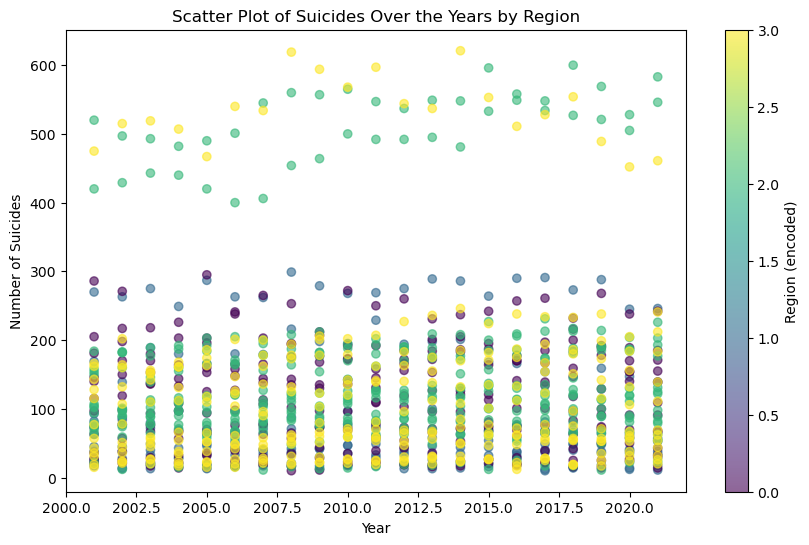

In [48]:
import matplotlib.pyplot as plt

# Generate a scatter plot to visualize the relationship between YEAR, Region, and Suicide
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_filtered['YEAR'], data_filtered['Suicide'], c=data_filtered['Region_encoded'], cmap='viridis', alpha=0.6)

# Add colorbar for the regions
plt.colorbar(scatter, label='Region (encoded)')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.title('Scatter Plot of Suicides Over the Years by Region')

# Show the plot
plt.show()


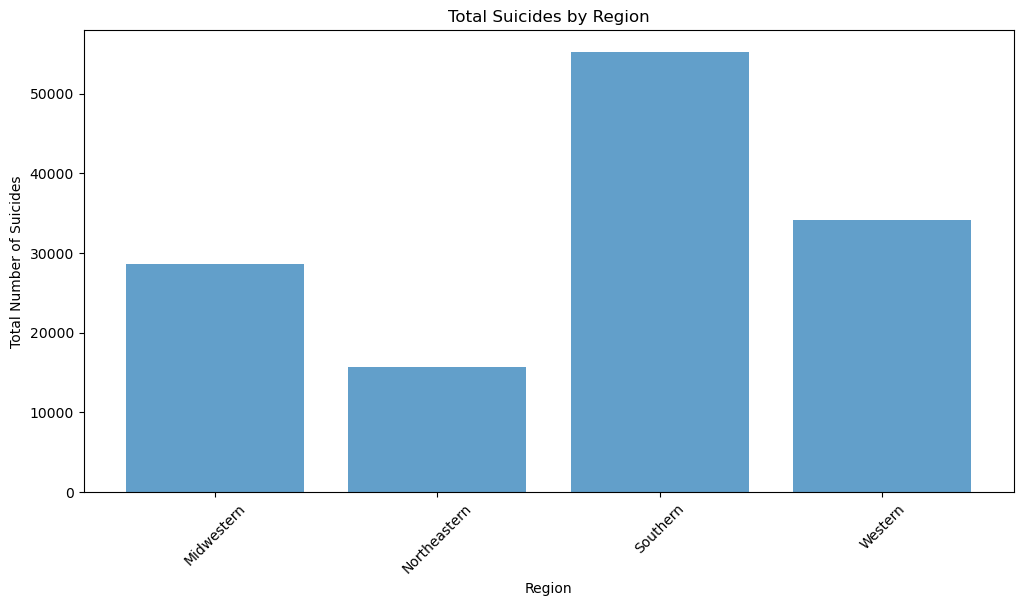

In [49]:
# Group the data by 'Region' to aggregate the number of suicides
region_suicide_data = data_filtered.groupby('Region')['Suicide'].sum().reset_index()

# Create a bar plot to visualize total suicides by region
plt.figure(figsize=(12, 6))
plt.bar(region_suicide_data['Region'], region_suicide_data['Suicide'], alpha=0.7)

# Set plot labels and title
plt.xlabel('Region')
plt.ylabel('Total Number of Suicides')
plt.title('Total Suicides by Region')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


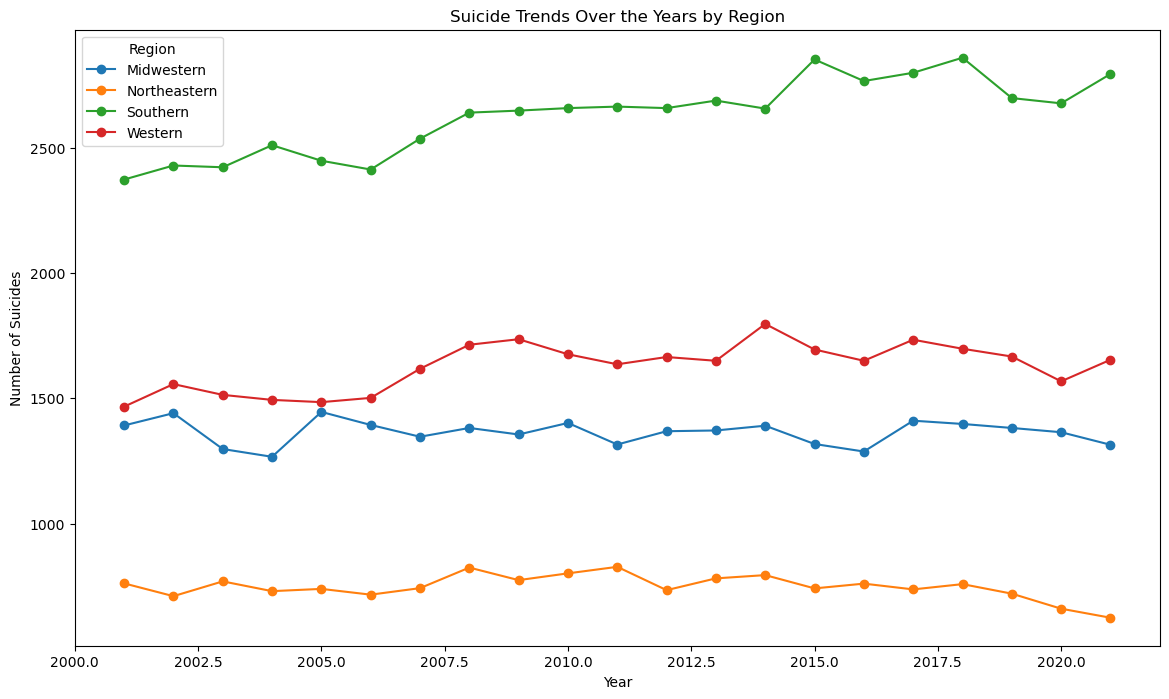

In [50]:
# Group the data by 'YEAR' and 'Region' to get the sum of suicides for each combination
region_year_trends = data_filtered.groupby(['YEAR', 'Region'])['Suicide'].sum().reset_index()

# Create a line plot to visualize the suicide trends over the years for each region
plt.figure(figsize=(14, 8))

# Plot each region's trend
for region in region_year_trends['Region'].unique():
    regional_data = region_year_trends[region_year_trends['Region'] == region]
    plt.plot(regional_data['YEAR'], regional_data['Suicide'], marker='o', label=region)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.title('Suicide Trends Over the Years by Region')

# Add legend
plt.legend(title='Region', loc='upper left')

# Show the plot
plt.show()
